# Forecast Tutorial

This tutorial will walk through forecast data from Unidata forecast model data using the forecast.py module within pvlib.

Table of contents:
1. [Setup](#Setup)
2. [Intialize and Test Each Forecast Model](#Instantiate-GFS-forecast-model)

This tutorial has been tested against the following package versions:
* Python 3.4.3
* IPython 4.0.1
* pandas 0.17.1
* matplotlib 1.5.0
* netcdf4 1.2.1
* siphon 0.3.2

It should work with other Python and Pandas versions. It requires pvlib >= 0.2.0 and IPython >= 3.0.

Authors:
* Derek Groenendyk (@moonraker), University of Arizona, November 2015
* Will Holmgren (@wholmgren), University of Arizona, November 2015

## Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
try:
    import seaborn as sns
    sns.set(rc={"figure.figsize": (12, 6)})
except ImportError:
    print('We suggest you install seaborn using conda or pip and rerun this cell')

# built in python modules
from datetime import datetime, timedelta
import os

# python add-ons
import numpy as np
import pandas as pd
try:
    import netCDF4
    from netCDF4 import num2date
except ImportError:
    print('We suggest you install netCDF4 using conda rerun this cell')

# for accessing UNIDATA THREDD servers
from siphon.catalog import TDSCatalog
from siphon.ncss import NCSS

from pvlib.forecast import GFS,HRRR_ESRL,NAM,NDFD,HRRR,RAP

C:\Users\DareRock\Anaconda3\envs\pvlibdev\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Choose a location and time.
# Tucson, AZ
latitude = 32.2
longitude = -110.9 
tz = 'US/Arizona'

start = datetime.now() # today's date
end = start + timedelta(days=7) # 7 days from today
timerange = pd.date_range(start, end, tz=tz)

## Instantiate GFS forecast model 

In [3]:
# GFS model, defaults to 0.5 degree resolution
fm = GFS()

In [4]:
# retrieve data
data = fm.get_query_data(latitude, longitude , timerange)

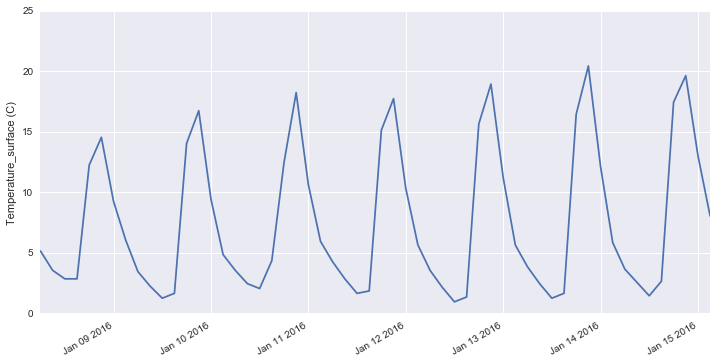

In [5]:
data['temperature'].plot()
plt.ylabel(fm.var_stdnames['temperature'] + ' (%s)' % fm.var_units['temperature'])

In [6]:
cloud_vars = ['total_clouds','low_clouds','mid_clouds','high_clouds']

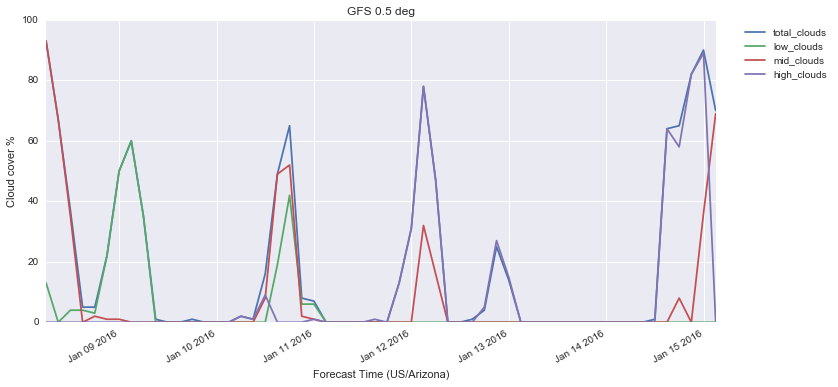

In [7]:
for varname in cloud_vars:
    data[varname].plot()
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('GFS 0.5 deg')
plt.legend(bbox_to_anchor=(1.18,1.0))

In [8]:
total_cloud_cover = data['total_clouds']

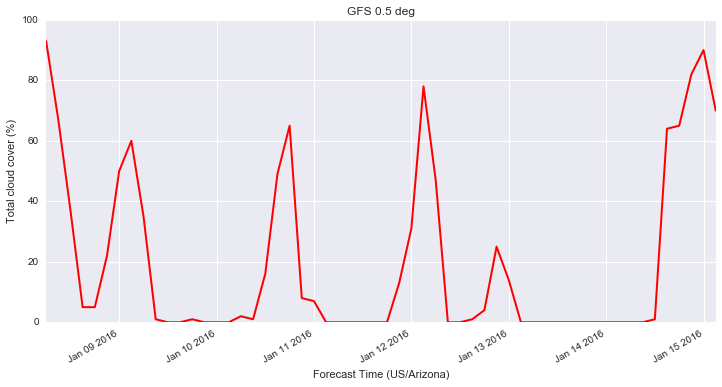

In [9]:
total_cloud_cover.plot(color='r', linewidth=2)
plt.ylabel('Total cloud cover' + ' (%s)' % fm.var_units['total_clouds'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('GFS 0.5 deg')

## Instantiate GFS forecast model 

In [10]:
# GFS model at 0.25 degree resolution
fm = GFS(res='quarter')

In [11]:
# retrieve data
data = fm.get_query_data(latitude, longitude , timerange)

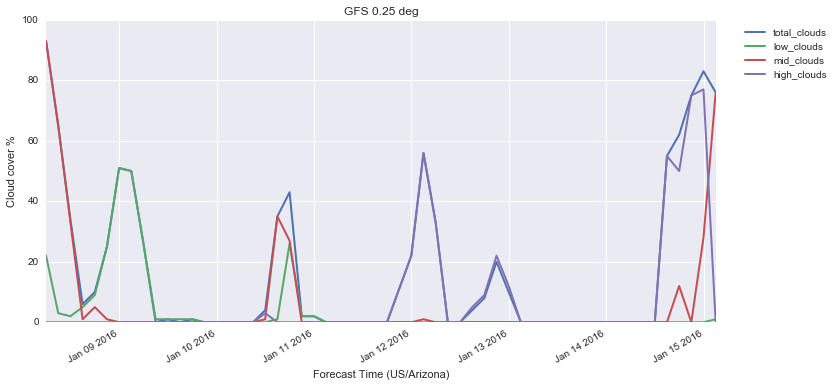

In [12]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('GFS 0.25 deg')
plt.legend(bbox_to_anchor=(1.18,1.0))

## Instaniate NAM forecast model 

In [13]:
fm = NAM()

In [14]:
# retrieve data
data = fm.get_query_data(latitude, longitude, timerange)

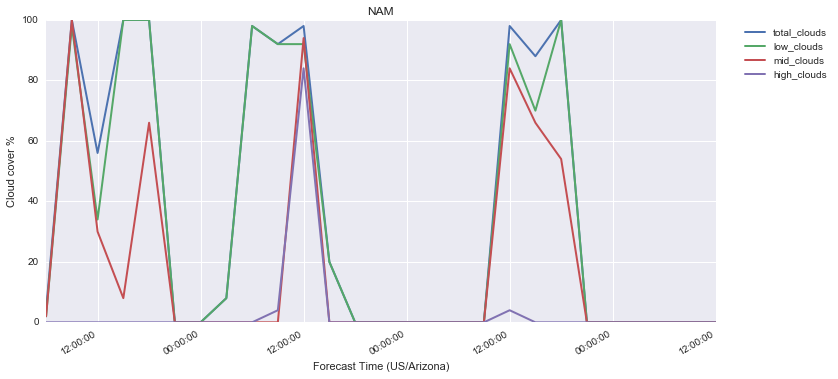

In [15]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('NAM')
plt.legend(bbox_to_anchor=(1.18,1.0))

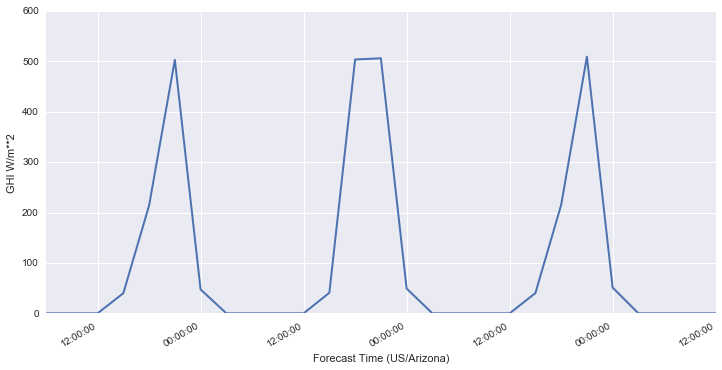

In [16]:
data['ghi'].plot(linewidth=2, ls='-')
plt.ylabel('GHI W/m**2')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')

## Instantiate NDFD forecast model 

In [17]:
fm = NDFD()

In [18]:
# retrieve data
data = fm.get_query_data(latitude, longitude, timerange)

In [19]:
total_cloud_cover = data['total_clouds']
temp = data['temperature']
wind = data['wind_speed']

(0, 100)

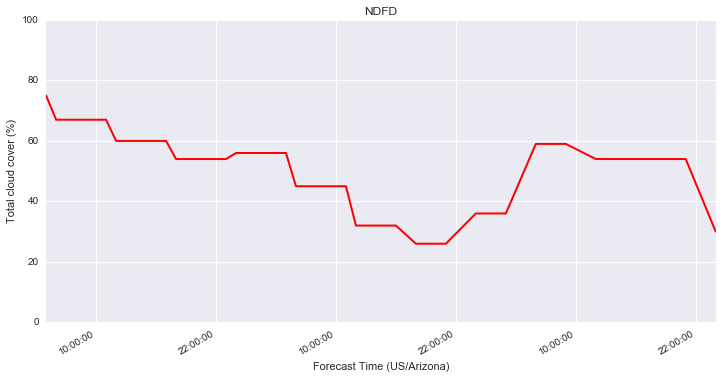

In [20]:
total_cloud_cover.plot(color='r', linewidth=2)
plt.ylabel('Total cloud cover' + ' (%s)' % fm.var_units['total_clouds'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('NDFD')
plt.ylim(0,100)

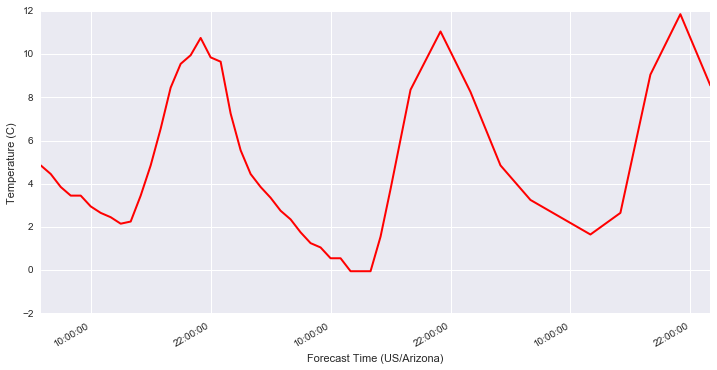

In [21]:
temp.plot(color='r', linewidth=2)
plt.ylabel('Temperature' + ' (%s)' % fm.var_units['temperature'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')    

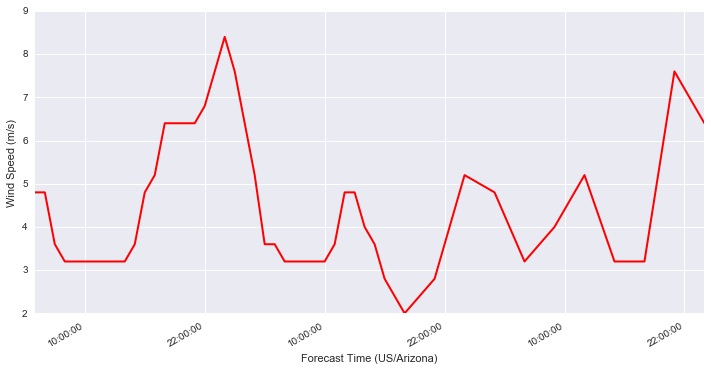

In [22]:
wind.plot(color='r', linewidth=2)
plt.ylabel('Wind Speed' + ' (%s)' % fm.var_units['wind_speed'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')   

## Instantiate RAP forecast model 

In [23]:
fm = RAP()

In [24]:
# retrieve data
data = fm.get_query_data(latitude, longitude, timerange)

In [25]:
cloud_vars = ['total_clouds','high_clouds','mid_clouds','low_clouds']

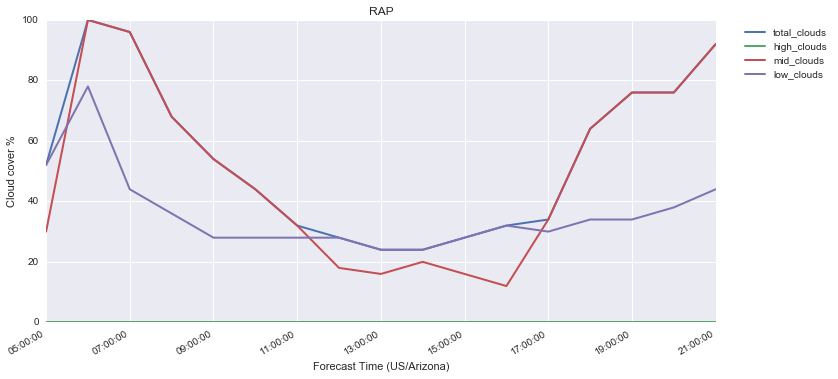

In [26]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('RAP')
plt.legend(bbox_to_anchor=(1.18,1.0))

## Instantiate HRRR forecast model 

In [27]:
fm = HRRR()

In [28]:
# retrieve data
data = fm.get_query_data(latitude, longitude, timerange)

In [29]:
cloud_vars = ['total_clouds','high_clouds','mid_clouds','low_clouds']

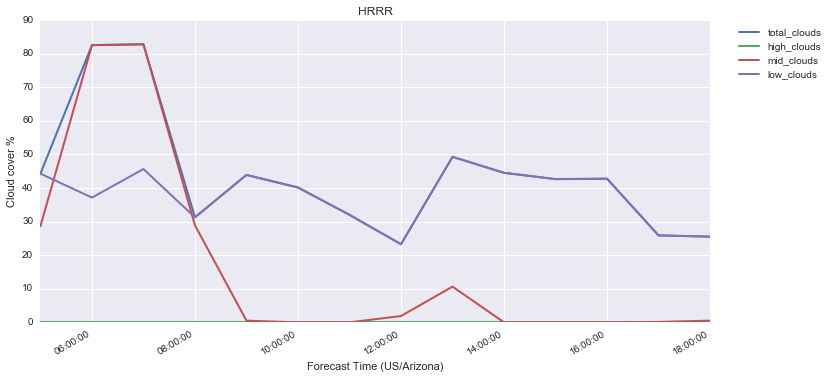

In [30]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('HRRR')
plt.legend(bbox_to_anchor=(1.18,1.0))

## Instanciate HRRR ESRL forecast model 

In [31]:
fm = HRRR_ESRL()

c:\programmingfolder\repositories\pvlib\pvlib\forecast.py:539: UserWarning: HRRR_ESRL is an experimental model and is not always available.
  + 'available.')


HTTPError: 404 Client Error: Not Found for url: http://thredds-jumbo.unidata.ucar.edu/thredds/catalog/grib/HRRR/CONUS_3km/surface/catalog.xml

In [ ]:
# retrieve data
data = fm.get_query_data(latitude, longitude, timerange)

In [ ]:
cloud_vars = ['total_clouds','high_clouds','mid_clouds','low_clouds']

In [ ]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('HRRR_ESRL')
plt.legend(bbox_to_anchor=(1.18,1.0))

In [ ]:
data['ghi'].plot(linewidth=2, ls='-')
plt.ylabel('GHI W/m**2')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')